To do <br>
 
 
For some reason channel 6 is not showing up in all my labels, maybe because the first entry is somehow empty? (how?) double check this 

# imports

In [1]:

# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pandas as pd

In [2]:
import matplotlib.gridspec as gridspec
import matplotlib

from matplotlib.offsetbox import AnchoredText
from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams

rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
matplotlib.rcParams.update({'font.weight': 'bold'})
fs = 30 # fontsize for plots
rc('axes', linewidth=2)



In [3]:
# # own definitions

# ChannelLabelList = ['channel 1','channel 2','channel 3','channel 4','channel 5','channel 6' ]  # labels of channels  
# ChannelLabelListShort = ['1','2','3','4','5','6' ] # shorter notation of ChannelLabelList
# bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.75) # for box around text in plot

# colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'gold']


# Custom imports

In [4]:
import sys

sys.path.append('/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star/Scripts')
import FormationChannel as FC
from PostProcessingScripts import *



# Read in the data

In [5]:
#general path to file (which I pass to the formationChannel file later)
path = '/Volumes/TOSHIBA EXT/black_hole-neutron_star/Fiducial/'

#specific path to use now
path1 = path+'COMPASOutput.h5'
fdata = h5.File(path1)
print(fdata.keys())

[u'RLOF', u'XRayBinaries', u'commonEnvelopes', u'cppSource', u'doubleCompactObjects', u'formationChannels', u'runtimes', u'supernovae', u'systems']


In [6]:
#Note above that COMPASOutput.h5 contains all the ascii files
#(if turned on in the pythonSubmit during the simulation)

#easy name for the doubleCompactObjects h5 group
fDCO      = fdata['doubleCompactObjects']

In [7]:
#chosenMetallicity= 0.001



fDCO  = fdata['doubleCompactObjects']
fForm = fdata['formationChannels']
fSN   = fdata['supernovae']
fCE  = fdata['commonEnvelopes']

totalSystems= len((fdata['systems']['mass1'][...].squeeze()))
print(totalSystems, 'total systems simulated')
#Only want BBHs



(29000123, 'total systems simulated')


# info about metallicities

# Obtain Detailed Evolution

In [8]:
G = 6.67259 * 10**(-8) # [gr cm s^2
c = 3 * 10**10
Msun = 1.99 * 10**(33)
AU = 1.5*10**11 #Rsun


Rsch = (G * 200*Msun / c**2 ) / AU

def KeplerIII(Pdays, M1sun, M2sun):
    G = 6.67259 * 10**(-8) # [gr cm s^2]
    a = (Pdays*24*3600)**(2/3) * (G * (M1sun + M2sun)*1.99 * 10**(33))**(1/3) * (4*np.pi**2)**(-1/3)
    
    separationAU = a / (1.49597871 * 10**13)
    return separationAU





In [21]:

# # set_channels(z= 0.001)
# channels,seeds = set_channels(z=0.001)
# seed_b, seed_a, seed_c, seed_d, seed_e, seed_f , seed_g    = seeds
# channel_b, channel_a, channel_c, channel_d, channel_e, channel_f, channel_g = channels

def printHeaders(seed, pathData): # x1, x2, x3,
    
    
    
    if metallicity==0.0142:
        pathZ = 'Z0_0142/'
    elif metallicity==0.001:
        pathZ="Z0_001/"
    else:
        print('Error: Z path not defined')
        
    outputPath = pathData + pathZ + str(seed)
    
    d = pd.read_csv(outputPath + '/dataOutput_0.dat', sep='\t', header=1) 

    
    print(np.asarray(list(d.columns)).T) 
    return

printHeaders(seed=422540310, pathData=dataDetailed)

['%SEED' 'dt' 'time' 'separation' 'eccentricity' 'mass1_0' 'mass2_0'
 'mass1' 'mass2' 'massEnv1' 'massEnv2' 'massCore1' 'massCore2'
 'massHeCore1' 'massHeCore2' 'massCOCore1' 'massCOCore2' 'Radius1'
 'Radius2' 'RocheLobe1/a' 'RocheLobe2/a' 'Radius1/RL1' 'Radius2/RL2'
 'omega1' 'omega2' 'omegaBreak1' 'omegaBreak2' 'S1type' 'S2type' 'Age1'
 'Age2' 'Lum1' 'Lum2' 'Teff1' 'Teff2' 'AngMom1' 'AngMom2' 'tauDynamical1'
 'tauDynamical2' 'tauThermal1' 'tauThermal2' 'tauNuclear1' 'tauNuclear2'
 'ZThermal1' 'ZThermal2' 'ZNuclear1' 'ZNuclear2' 'ZSPH1' 'ZSPH2' 'ZSPHHe1'
 'ZSPHHe2' 'ZHurley1' 'ZHurley2' 'ZHurleyHe1' 'ZHurleyHe2' 'Zsimple1'
 'Zsimple2' 'dmWinds1' 'dmWinds2' 'dmMassTransfer1' 'dmMassTransfer2'
 'MTtype' 'AngMomTotal' 'EnergyTotal' 'Nanjing1' 'Nanjing2' 'Loveridge1'
 'Loveridge2' 'Kruckow1Top' 'Kruckow2Top' 'Kruckow1Mid' 'Kruckow2Mid'
 'Kruckow1Bot' 'Kruckow2Bot' 'Metallicity1' 'Metallicity2'
 'massTransferTracker' 'pulsarMagneticField1' 'pulsarMagneticField2'
 'pulsarSpinFrequency1' 'pu

In [9]:
ST_dict = {'0' : 'smallMS', '1' : ' MS ', '2' : ' HG ', '3' : ' GB ',\
           '4' : 'CHeB', '5' : 'EAGB', '6' : 'TPAGB', '7' : 'HeMS'\
          , '8' : 'HeHG', '9' : 'HeGB', '10' : 'HeWD', '11' : 'COWD', '12' :'ONeWD', '13' : '  NS', '14' : '  BH'  }

In [ ]:
ST_dict['1']

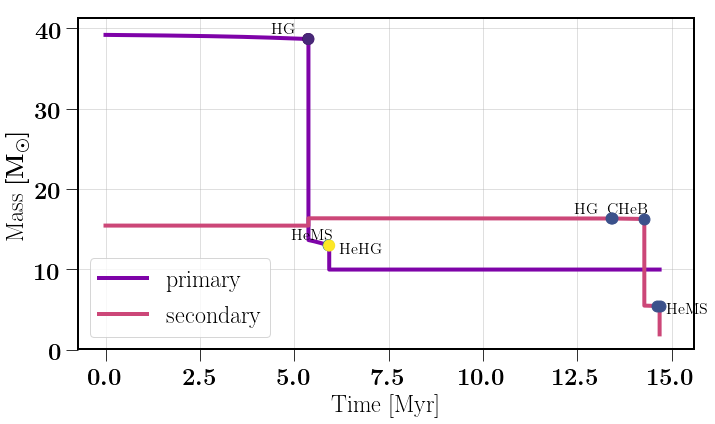

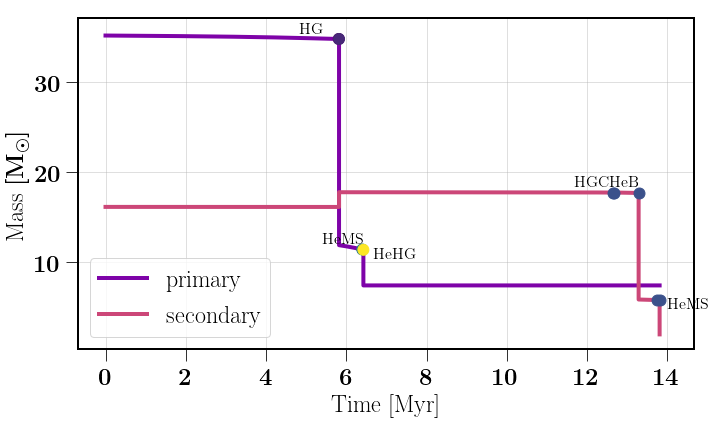

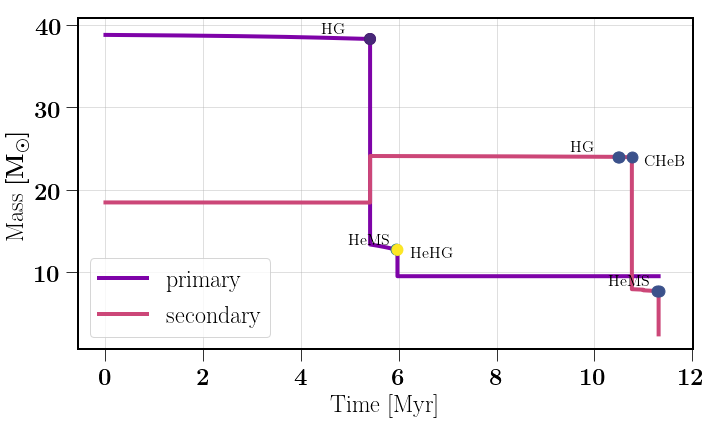

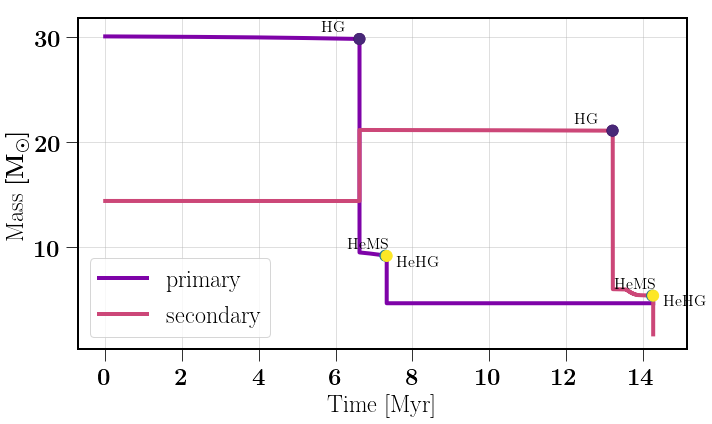

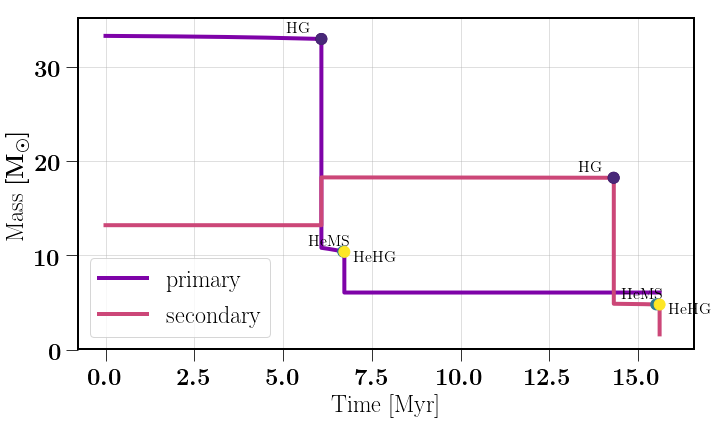

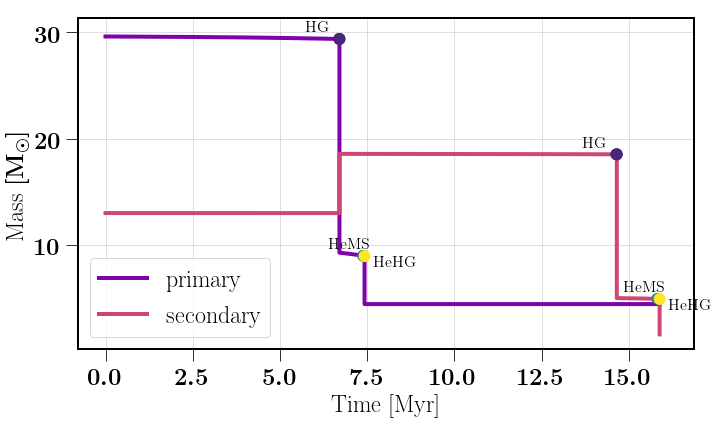

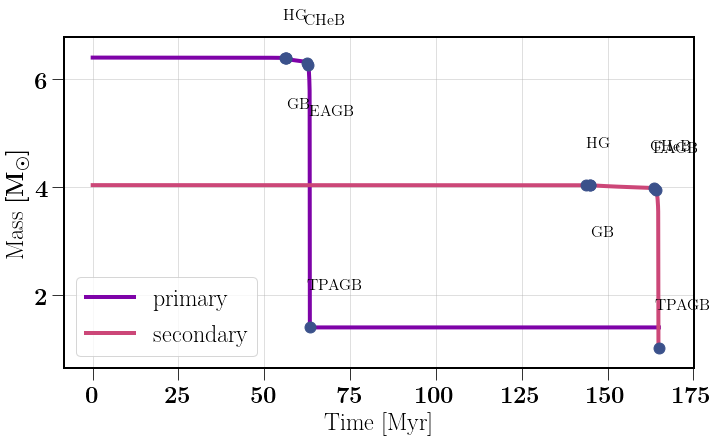

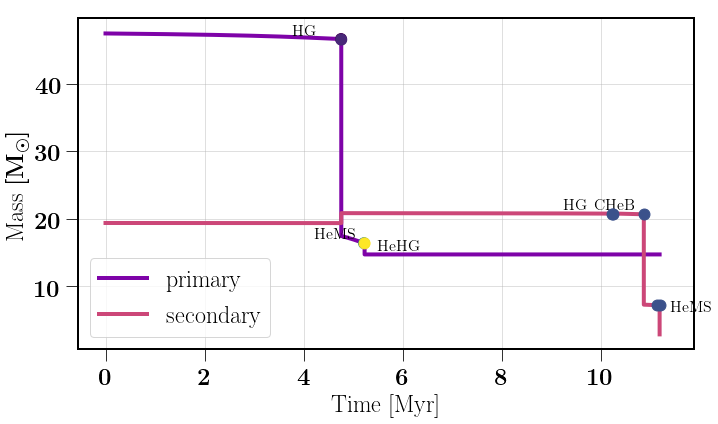

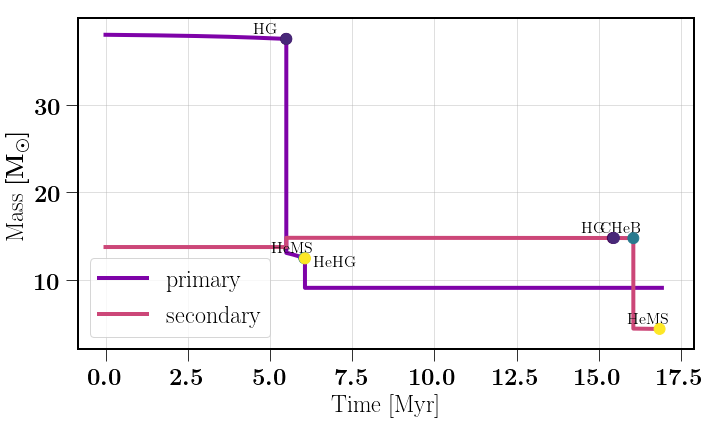

In [28]:
def plotDetailedEvolution(seed, x_m1, x_m2, ylabel, pathData,metallicity): # x1, x2, x3,
    """    """
    
    
    if metallicity==0.0142:
        pathZ = 'Z0_0142/'
    elif metallicity==0.001:
        pathZ="Z0_001/"
    else:
        print('Error: Z path not defined')
        
        
        
    outputPath = pathData + pathZ+ str(seed)
    
    data = np.genfromtxt(outputPath + '/dataOutput_0.dat', skip_header=1, names=True) 
    
    # obtaingiven parameters
    param_m1 = data[x_m1]
    param_m2 = data[x_m2]
    
    # we always need the parameters below
    StellarType1 = data['S1type']
    StellarType2 = data['S2type']
    time = data['time']
    
    # obtain mask for when Stellar Type changes 
    maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
    maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]
    
    
    f, axarr = plt.subplots(1, 1, figsize=(10, 6))
    # plot given parameters for star 1 and star 2
    axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = 'primary')
    axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = 'secondary')
    

    # plot stellartype + a scatter point when steller type changes
    axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder=1000)
    axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder = 1000)
    
    
    x_offset, y_offset = .25, .7
    
    time_prev_1 = 0
    time_prev_2 = 0
    for ind, ST in enumerate(StellarType1[maskST1changes][:]):
        if ind==0:
            continue
        else:
            time_this_1 = time[maskST1changes][ind] 
            time_this_2 = time[maskST2changes][ind] 
            
            if abs(time_this_1 - time_prev_1) >= 1./3:
                axarr.text(time[maskST1changes][ind]-(x_offset+.75), param_m1[maskST1changes][ind]+(y_offset), \
                           s=ST_dict[str(int(ST))] , fontsize = 16)
            else:
                axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(ST))] , fontsize = 16)
                
            if abs(time_this_2 - time_prev_2) >= 1./2:
                axarr.text(time[maskST2changes][ind] -(x_offset+.75), param_m2[maskST2changes][ind]+(y_offset), \
                           s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
            else:
                axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)

        time_prev_1 = time[maskST1changes][ind] 
        time_prev_2 = time[maskST2changes][ind] 
    
    # make plot look nicer with code below
    axarr.legend(fontsize = 24 , loc = 'lower left')

    axarr.grid(which='both')
    axarr.grid(which='minor', alpha=0.2)
    axarr.grid(which='major', alpha=0.5) 

    axarr.grid(True)
    axarr.tick_params(labelsize=24)
    axarr.set_xlabel('Time [Myr]', fontsize=24)
    axarr.set_ylabel('%s'%ylabel, fontsize=24)     
    
#     f.tight_layout()

    plt.tight_layout()
    plt.savefig('/Users/floorbroekgaarden'+\
    '/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star' +\
    '/PlottingScripts/3_DCO-Population/DetailedPlots/'+pathZ+str(seed)+'.pdf')
    plt.show()
    
    
    return



dataDetailed = '/Volumes/TOSHIBA EXT/black_hole-neutron_star/Fiducial/detailed/'
# metallicity = 0.0142
# seedsListZ0_0142 =  [423008360, 426005772,428003416,421571114,421529742,427512491,429011652,421033982]


metallicity = 0.001
seedsListZ0_001 =  [423003807, 423011944, 420034019, 428020995,421505314,422555137,428029307, 423026010,422540310   ]

for seeds in seedsListZ0_001:
    plotDetailedEvolution(seed=seeds,x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$', pathData=dataDetailed, metallicity=metallicity)




# Radii

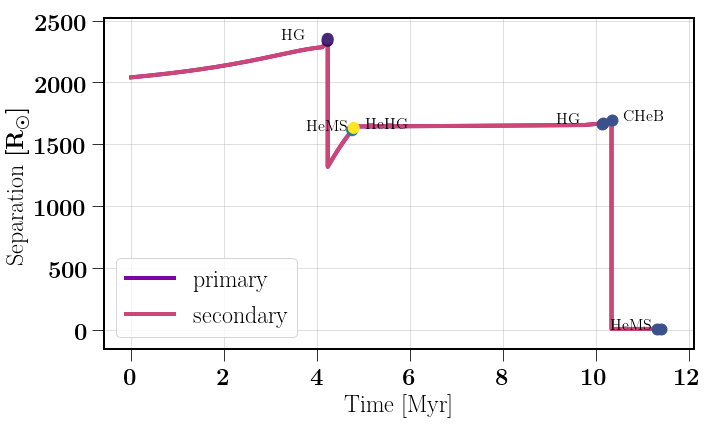

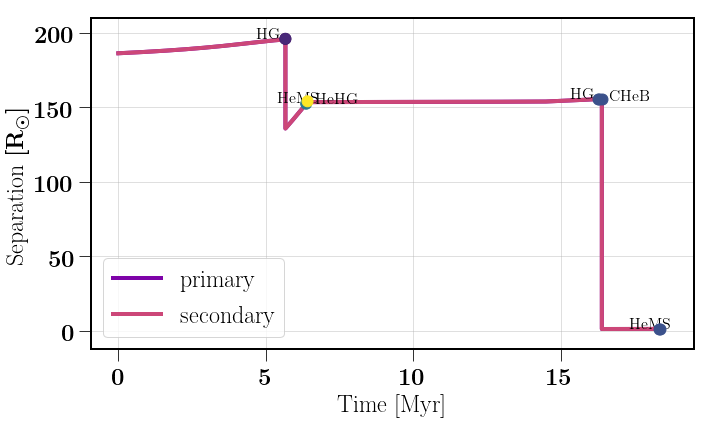

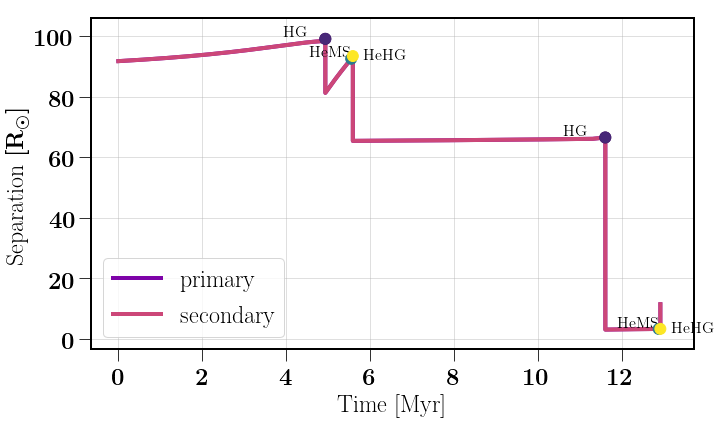

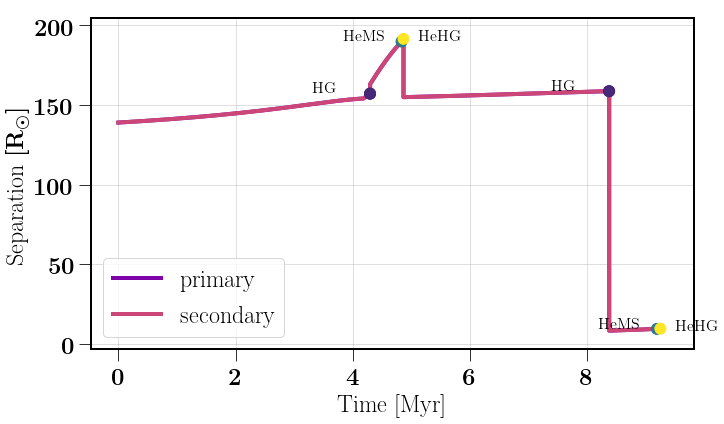

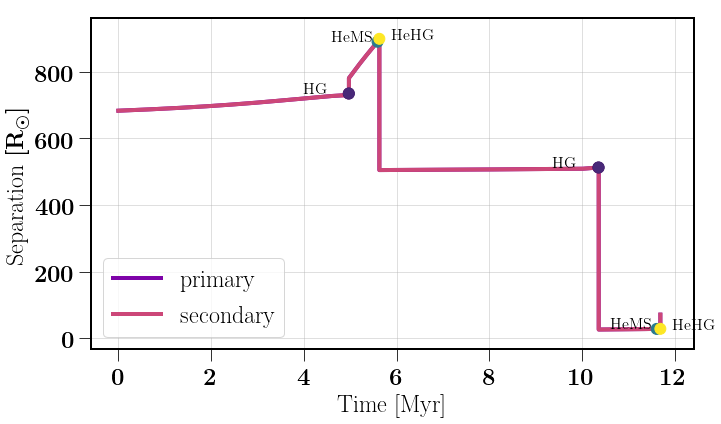

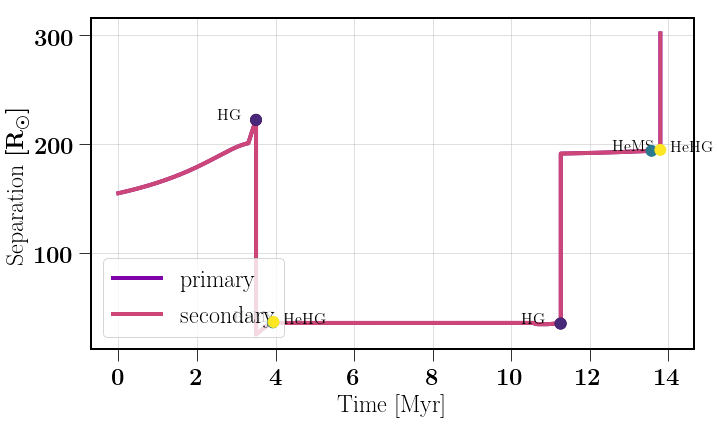

IndexError: index 1 is out of bounds for axis 0 with size 0

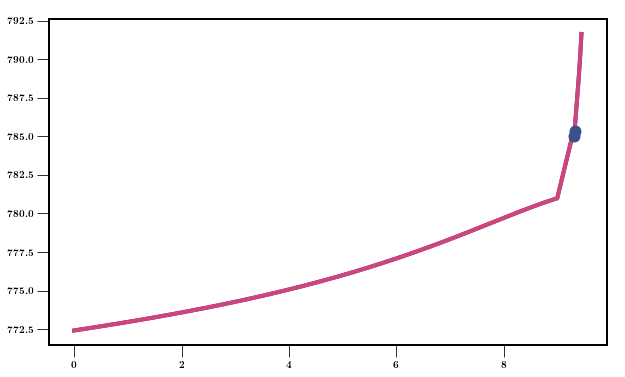

In [35]:
def plotDetailedEvolution(seed, x_m1, x_m2, ylabel, pathData,metallicity): # x1, x2, x3,
    """    """
    
    
    if metallicity==0.0142:
        pathZ = 'Z0_0142/'
    elif metallicity==0.001:
        pathZ="Z0_001/"
    else:
        print('Error: Z path not defined')
        
        
        
    outputPath = pathData + pathZ+ str(seed)
    
    data = np.genfromtxt(outputPath + '/dataOutput_0.dat', skip_header=1, names=True) 
    
    # obtaingiven parameters
    param_m1 = data[x_m1]
    param_m2 = data[x_m2]
    
    # we always need the parameters below
    StellarType1 = data['S1type']
    StellarType2 = data['S2type']
    time = data['time']
    
    # obtain mask for when Stellar Type changes 
    maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
    maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]
    
    
    f, axarr = plt.subplots(1, 1, figsize=(10, 6))
    # plot given parameters for star 1 and star 2
    axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = 'primary')
    axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = 'secondary')
    

    # plot stellartype + a scatter point when steller type changes
    axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder=1000)
    axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder = 1000)
    
    
    x_offset, y_offset = .25, .7
    
    time_prev_1 = 0
    time_prev_2 = 0
    for ind, ST in enumerate(StellarType1[maskST1changes][:]):
        if ind==0:
            continue
        else:
            time_this_1 = time[maskST1changes][ind] 
            time_this_2 = time[maskST2changes][ind] 
            
            if abs(time_this_1 - time_prev_1) >= 1./3:
                axarr.text(time[maskST1changes][ind]-(x_offset+.75), param_m1[maskST1changes][ind]+(y_offset), \
                           s=ST_dict[str(int(ST))] , fontsize = 16)
            else:
                axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(ST))] , fontsize = 16)
                
            if abs(time_this_2 - time_prev_2) >= 1./2:
                axarr.text(time[maskST2changes][ind] -(x_offset+.75), param_m2[maskST2changes][ind]+(y_offset), \
                           s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
            else:
                axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)

        time_prev_1 = time[maskST1changes][ind] 
        time_prev_2 = time[maskST2changes][ind] 
    
    # make plot look nicer with code below
    axarr.legend(fontsize = 24 , loc = 'lower left')

    axarr.grid(which='both')
    axarr.grid(which='minor', alpha=0.2)
    axarr.grid(which='major', alpha=0.5) 

    axarr.grid(True)
    axarr.tick_params(labelsize=24)
    axarr.set_xlabel('Time [Myr]', fontsize=24)
    axarr.set_ylabel('%s'%ylabel, fontsize=24)     
    
#     f.tight_layout()

    plt.tight_layout()
    plt.savefig('/Users/floorbroekgaarden'+\
    '/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star' +\
    '/PlottingScripts/3_DCO-Population/DetailedPlots/'+pathZ+'separation'+str(seed)+'.pdf')
    plt.show()
    
    
    return



dataDetailed = '/Volumes/TOSHIBA EXT/black_hole-neutron_star/Fiducial/detailed/'
metallicity = 0.0142
seedsListZ0_0142 =  [423008360, 426005772,428003416,421571114,421529742,427512491,429011652,421033982]


# metallicity = 0.001
# seedsListZ0_001 =  [423003807, 423011944, 420034019, 428020995,421505314,422555137,428029307, 423026010,422540310   ]

for seeds in seedsListZ0_0142:
    plotDetailedEvolution(seed=seeds,x_m1='separation', x_m2='separation', ylabel=r'Separation $[\rm{R}_{\odot}]$', pathData=dataDetailed, metallicity=metallicity)





In [ ]:
# def plotDetailedEvolution4Panels(seed, pathData):
    
#     outputPath = pathData + str(seed)
    
#     d = np.genfromtxt(outputPath + '/dataOutput_0.dat', names=True,skip_header=1 )
    
#     time = d['time']
#     separation = d['separation']
#     mass1_0 = d['mass1_0']
#     mass2_0 = d['mass2_0']
#     S1type = d['S1type']
#     S2type = d['S2type']
#     mass1 = d['mass1']
#     mass2 = d['mass2']
#     Radius1 = d['Radius1']
#     Radius2 = d['Radius2']
#     RocheLobe1 = np.asarray(d['RocheLobe1a'])*separation
#     RocheLobe2 = np.asarray(d['RocheLobe2a'])*separation

    
#     totalmass = mass1 + mass2 
    
    
#     var = [separation,  Radius1, mass1, S1type]
#     var2 = [mass2_0, Radius2, mass2, S2type]
#     label = [' separation [Rsol]',  'Radius Rsun', 'mass',  'stellar type']


#     #label2 = [' separation [Rsol]', 'mass_0 [Msun]', 'stellar type']
#     legend = ['', 'star1', 'star1']
#     legend2 = ['', 'star2', 'star1']

#     f, axarr = plt.subplots(len(var),1 , figsize=(20, 40))




#     i = 1
#     for j in range(len(var)):





#             if j==0:
#                 axarr[j].set_yscale('log')
#                 axarr[j].plot(time, var[j], lw = 5, c='k', label = 'star1')









#             # plot also second star
#             else: # (j ==1) | (j==2) | (j==3) :

#                 axarr[j].plot(time, var[j], lw = 5, c='r', label = 'star1')
#                 axarr[j].plot(time, var2[j], lw = 5, c='b', label = '%s'%legend2[1])
#                 axarr[j].legend(fontsize = 20 , loc = 'lower left')


#             if j==1:
#                 axarr[j].plot(time, RocheLobe1, lw = 5, c='r', ls='--', label = 'RL1')
#                 axarr[j].plot(time, RocheLobe2, lw = 5, c='b', ls='--', label = 'RL2')
#                 axarr[j].legend(fontsize = 20 , loc = 'lower left')
# #                 axarr[j].set_yscale('log')

#             if j==2: 
#                 axarr[j].plot(time, totalmass, lw = 5, c='k', label = 'total')
#                 axarr[j].legend(fontsize = 20 , loc = 'lower left')



#             axarr[j].grid(which='both')
#             axarr[j].grid(which='minor', alpha=0.2)
#             axarr[j].grid(which='major', alpha=0.5) 

#             axarr[j].grid(True)
#             axarr[j].tick_params(labelsize=30)
#             axarr[j].set_xlabel(' time [Myr]', fontsize=40)


#             axarr[j].set_ylabel('%s'%label[j], fontsize=40)        


#     #         major_ticks = np.arange(min(time), max(time)+1, 20)
#     #         minor_ticks = np.arange(min(var[j]), max(var[j]), 5)

#     #         axarr[j].set_xticks(major_ticks)
#     #         axarr[j].set_xticks(minor_ticks, minor=True)
#     #         axarr[j].set_yticks(major_ticks)
#     #         axarr[j].set_yticks(minor_ticks, minor=True)            
#     #         if i == 2:
#     #             axarr[i, j].set_yscale('log')
#     #         if j == 2:
#     #             axarr[i, j].set_xscale('log')

#     #     else:
#     #         axarr[i, j].axis('off')


#     plt.tight_layout()
#     # plt.xticks()


# #     plt.savefig('/home/floor/Documents_Thesis/DataAnalysis/images/SuperEddingtonAccretionTotal_1.png')
#     plt.show()    
    
    
    
#     return

# plotDetailedEvolution(seed=seed_g[0], pathData=dataDetailed)

